# Electricity Bill Management System 

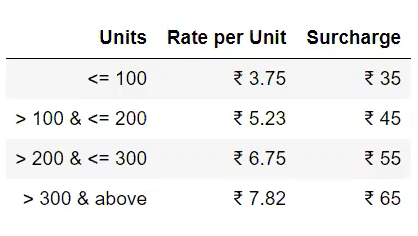

Import Section :

In [ ]:
from datetime import date, timedelta
from prettytable import PrettyTable
from PIL import Image ,ImageDraw , ImageFont
import xlsxwriter
import pandas as pd
from openpyxl.workbook import Workbook
from openpyxl import load_workbook

Function Section :

In [ ]:
def bill_amt (Units_Consumed):
    if Units_Consumed <= 100 :
        Bill_Amount = Units_Consumed * 3.5 + 35
    elif Units_Consumed <= 200 :
        Bill_Amount = Units_Consumed * 5.23 + 45
    elif Units_Consumed <= 300 :
        Bill_Amount = Units_Consumed * 675 + 55
    else:
        Bill_Amount = Units_Consumed * 7.82+ 65
    return Bill_Amount

In [ ]:
def bill_print (Date ,Customer_Number ,Account_Holder_Name ,Current_Meter_Reading ,Previous_Meter_Reading ,Units_Consumed ,Bill_Amount ,Due_Date):
    bill = PrettyTable()
    bill.field_names = ["Particulars", "Data"]
    
    bill.add_rows = ([
        [1,"Date",Date],
        [2,"Customer Number",Customer_Number],
        [3,"Account Holder Name",Account_Holder_Name],
        [4,"Current Meter Reading",Current_Meter_Reading],
        [5,"Previous Meter Reading",Previous_Meter_Reading],
        [6,"Units Consumed",Units_Consumed],
        [7,"Net Bill Amount (Inclusive of All Taxex) ₹",Bill_Amount],
        [8,"Due Date",Due_Date],
    ])
    
    bill.align = "l"
    
    img = Image.new('RGB' , (500,250), color = 'white')
    fnt = ImageFont.truetype('arial.ttf',15)
    draw = ImageDraw.Draw(img)
    draw.text ((10,10),str(bill), font= fnt, fill = 'black')
    img.save(str(Customer_Number) + '.png')
               
    return bill

In [ ]:
def exl_create():
    content = {'A': 'Date','B':'Customer Number','C':'Account Holder Name','D':'Current Meter Reading','E':'Previous Meter Reading','F':'Units Consumed','G':'Net Bill Amount (Inclusive of All Taxex) ₹','H':'Due Date'}
    workbook = xlsxwriter.Workbook('Bill Data.xlsx')
    workbook = workbook.add_worksheet()
    
    for key , value in content.items():
        worksheet.write(key + '1', value, bold)
    workbook.close()
    
    return "Excel Sheet is Created !"        

In [ ]:
def bill_data(Date ,Customer_Number ,Account_Holder_Name ,Current_Meter_Reading ,Previous_Meter_Reading ,Units_Consumed ,Bill_Amount ,Due_Date):
    data = [[
        Date ,
        Customer_Number ,
        Account_Holder_Name ,
        Current_Meter_Reading ,
        Previous_Meter_Reading ,
        Units_Consumed ,
        Bill_Amount ,
        Due_Date
    ]]
    
    
    df = pd.DataFrame(data,columns= [
        'Date' ,
        'Customer Number' ,
        'Account Holder Name' ,
        'Current Meter Reading' ,
        'Previous Meter Reading' ,
        'Units Consumed' ,
        'Bill Amount' ,
        'Due Date'
    ])
    
    book = load_workbook('Bill Data.xlsx')
    writer = pd.ExcelWriter('Bill Data.xlsx', engine = 'openpyxl')
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}

    for sheetname in writer.sheets:
        df.ti_excel(writer, sheet_name - "Sheet1", startrow = writer.sheets[sheetname].max_row , index = False , header = False)

    writer.save()

    return "Database Updated"

Main Code Section :

In [ ]:
print("Welcome to Electricity Bill Management System\n",exl_create(),'\n')

while True:
    Date = date.today().isoformat()
    Due_Date = (date.today() + timedelta(days = 30)).isoformat()
    Customer_Number = int(input("Entre Customer Number: "))
    Account_Holder_Name = input("Entre Account Holder Name: ")
    Current_Meter_Reading = float(input("Entre Current Meter Reading: "))
    Previous_Meter_Reading = float(input("Entre Previous Meter Reading: "))
    Units_Consumed = Current_Meter_Reading - Previous_Meter_Reading 
    Bill_Amount = bill_amt(Units_Consumed)
    
    print(bill_print(Date ,Customer_Number ,Account_Holder_Name ,Current_Meter_Reading ,Previous_Meter_Reading ,Units_Consumed ,Bill_Amount ,Due_Date))
    print("Bill Printed Succesfully !")
    
    print(bill_data(Date ,Customer_Number ,Account_Holder_Name ,Current_Meter_Reading ,Previous_Meter_Reading ,Units_Consumed ,Bill_Amount ,Due_Date))
    
    dec = input("Do you want to feed in next Bill data ? Y/N: ")
    print()
    if dec.upper() == "N":
        print("Thank You !")
        break 